In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
## Import for partitioning the data
from sklearn.model_selection import train_test_split
## Classifier Imports
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
# Imports for showing the data
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import tree
# Import for saving the model
from joblib import dump, load


### Reading in the data##################################################################################
dat = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
#########################################################################################################

### Encoding the data ###################################################################################
### Assigning number values to all strings and removing 'contact' and 'day_of_week'
## Seperating numerical and categorical so numerical does not get encoded
dat_cat = dat.drop(["age", "campaign", "pdays",	"previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", 'contact', 'day_of_week'], axis = 1)
dat_num = dat.drop(["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"], axis = 1)

# Rejoining numerical and categorical
dat_encoded = dat_cat.apply(preprocessing.LabelEncoder().fit_transform)
dat_encoded = pd.concat([dat_num, dat_encoded], axis=1)
##########################################################################################################

#####Creating the High and Low Economy####################################################################
dat_high = dat_encoded[ dat_encoded["cons.conf.idx"] >= -40]
dat_low = dat_encoded[ dat_encoded["cons.conf.idx"] < -40]
##########################################################################################################

### Creating the features and the target##################################################################
X = dat_encoded.drop('y', axis=1)
y = dat_encoded['y']

X_high = dat_high.drop('y', axis=1)
y_high = dat_high['y']

X_low = dat_low.drop('y', axis=1)
y_low = dat_low['y']

## Partitioning the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X, y, test_size=0.20)
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X, y, test_size=0.20)
###########################################################################################################

####OVERSAMPLING###########################################################################################
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html


# Let's over sample the minority class, which samples with replacement until the
# majority (died) and the minority (survived) are equal
ro = RandomOverSampler()

# Oversample, note that we oversample X and y at the same time in order to 
# make sure our features and targets stay synched.
X_train_new, y_train_new = ro.fit_resample(X_train, y_train)
X_test_new, y_test_new = ro.fit_resample(X_test, y_test)

X_train_new_high, y_train_new_high = ro.fit_resample(X_train_high, y_train_high)
X_test_new_high, y_test_new_high = ro.fit_resample(X_test_high, y_test_high)

X_train_new_low, y_train_new_low = ro.fit_resample(X_train_low, y_train_low)
X_test_new_low, y_test_new_low = ro.fit_resample(X_test_low, y_test_low)
############################################################################################################

#### Three different types of classifiers that were tried###################################################

### OG Classifier
### Was nice, but only can do so much
#classifier = DecisionTreeClassifier()
#classifier.fit(X_train_new, y_train_new)


### Forest Classifier
### A forest of decision trees.
### Best precision of the three at ~0.86, but recall was low at ~0.38
#clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
#clf = clf.fit(X_train_new, y_train_new)

##Bagging Classifier
# Personal Favorite and makes the most sense to use because of how deep our decision tree is.
# Best Recall at ~0.64 and precision at ~0.80
clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.25)
clf = clf.fit(X_train_new, y_train_new)

clf_high = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.25)
clf_high = clf.fit(X_train_new_high, y_train_new_high)

clf_low = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.25)
clf_low = clf_low.fit(X_train_new_low, y_train_new_low)
#############################################################################################################

####Saving the Model#########################################################################################
dump(clf, 'teddyjustrightModel.joblib')
dump(clf_high, 'teddy2highModel.joblib')
dump(clf_low, 'teddy2lowModel.joblib') 
#############################################################################################################

##PREDICITON TIME############################################################################################
y_pred = clf.predict(X_test_new)

y_pred_high = clf_high.predict(X_test_new_high)

y_pred_low = clf_low.predict(X_test_new_low)

## Displaying the data


print(confusion_matrix(y_test_new, y_pred))
print(classification_report(y_test_new, y_pred))

print(confusion_matrix(y_test_new_high, y_pred_high))
print(classification_report(y_test_new_high, y_pred_high))

print(confusion_matrix(y_test_new_low, y_pred_low))
print(classification_report(y_test_new_low, y_pred_low))



### Showing the tree, but it takes a hot minute cause the tree is so big
#fig, ax = plt.subplots(figsize=(20, 20))
#tree.plot_tree(classifier, fontsize=10, feature_names=X.columns)
#plt.show()
##############################################################################################################

ModuleNotFoundError: No module named 'sklearn'

In [4]:
import seaborn as sns
import pandas as pd

banco = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

for x in list(banco):
  banco = banco[banco[x] != "unknown"]

for x in list(banco.columns):
  banco[x] = pd.factorize(banco[x])[0]


ax = sns.heatmap(banco, annot=True, fmt="d")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8D9D9DC10> (for post_execute):


KeyboardInterrupt: 

<Figure size 57600x57600 with 0 Axes>

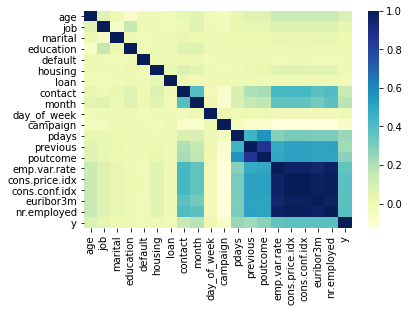

<Figure size 57600x57600 with 0 Axes>

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = sns.heatmap(banco.corr(), cmap="YlGnBu")
plt.figure(figsize=(800,800))

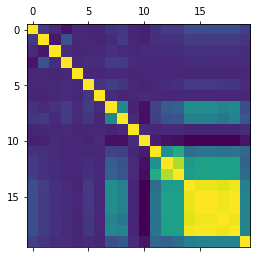

In [18]:
import matplotlib.pyplot as plt

plt.matshow(banco.corr())
plt.show()

In [1]:
banco.head()

NameError: name 'banco' is not defined

In [21]:
banco.corr().y

age               0.082220
job               0.041953
marital           0.016825
education         0.018468
default          -0.003776
housing           0.010071
loan             -0.005026
contact           0.143859
month             0.183191
day_of_week       0.007870
campaign         -0.068081
pdays             0.243060
previous          0.228003
poutcome          0.271047
emp.var.rate      0.357292
cons.price.idx    0.375389
cons.conf.idx     0.375389
euribor3m         0.372441
nr.employed       0.381509
y                 1.000000
Name: y, dtype: float64

In [22]:
import seaborn as sns
import pandas as pd
import altair as alt

banco = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
banco.y = banco.y.map({'yes': 1, 'no': 0})
banco.head()

dat_cat = banco[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", 'contact', "y"]]
dat_num = banco[["age", "campaign", "pdays",	"previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", 'contact', 'day_of_week']]
dummies = pd.concat([dat_num, pd.get_dummies(dat_cat)], axis=1)
dummies.head()

#banco.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,day_of_week,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,mon,...,0,1,0,0,0,0,1,0,0,1
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,mon,...,0,1,0,0,0,0,1,0,0,1
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,mon,...,0,1,0,0,0,0,1,0,0,1
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,mon,...,0,1,0,0,0,0,1,0,0,1
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,mon,...,0,1,0,0,0,0,1,0,0,1


In [8]:
banco.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.030399,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


In [10]:
codes, uniques = pd.factorize(['b', 'b', 'a', 'c', 'b'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [9]:
corY = pd.DataFrame(banco.corr().y).reset_index()
corY.head()

,index,y
0,age,0.030399
1,campaign,-0.066357
2,pdays,-0.324914
3,previous,0.230181
4,emp.var.rate,-0.298334


In [71]:
alt.Chart(corY).mark_bar().encode(
    x = 'index',
    y = 'y',
    color= alt.condition(
        alt.datum.y > 0, 
        alt.value("steelblue"),
        alt.value("red"))
).properties(
    width=1000,
    height= 500
)

alt.Chart(...)